In [71]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("final_data7.csv")
print(df.shape)
df.head()


(1819, 25)


,url,label,url_length,special_character_count,having_ip_address,dns_response_time,handshake_time,data_time,data_length,redirect,...,external_link_count,total_strings_count,average_string_length,max_len_strings,strings_above_avglength,whois_creation_date,whois_expiry_date,whois_last_updated,whois_country,whois_city
0,twitter.com/aQuariusrecOrds,good,27,2,0,1.866579,809.915781,185.235262,301912.0,False,...,73.0,26397.0,63.022881,46438.0,2436.0,2000-01-21T16:28:17Z,2020-01-21T16:28:17Z,2018-12-07T19:32:35Z,US,CA
1,tong464.org/,good,12,2,0,654.555559,3379.443407,799.807549,162844.0,True,...,18.0,9289.0,11.865217,5491.0,2936.0,2006-04-11T19:49:29Z,2025-04-11T19:49:29Z,2016-04-07T14:34:10Z,country_not_available,state_not_available
2,legacy.com/obituaries/orlandosentinel/obituary...,good,92,12,0,57.567120,2735.617161,29.102325,129957.0,True,...,58.0,22093.0,44.528946,28934.0,4508.0,1994-02-01T05:00:00Z,2021-12-20T17:37:52Z,2019-04-01T20:15:54Z,US,FL
3,natcath.org/ncr_onli.htm,good,24,3,0,1.390219,1009.941101,0.138521,3453.0,False,...,1.0,8.0,8.000000,8.0,0.0,1998-06-18T04:00:00Z,2024-06-17T04:00:00Z,2019-04-19T06:57:43Z,country_not_available,state_not_available
4,wn.com/San_Diego_State_Aztecs,good,29,2,0,1.077890,6096.054077,350.750208,204520.0,False,...,41.0,8248.0,12.376940,5491.0,2477.0,1995-03-23T05:00:00Z,2029-03-24T04:00:00Z,2019-04-12T19:51:39Z,REDACTED FOR PRIVACY,REDACTED FOR PRIVACY


In [73]:
# Quick statistical summary of data
df.describe(include='all')

,url,label,url_length,special_character_count,having_ip_address,dns_response_time,handshake_time,data_time,data_length,redirect,...,external_link_count,total_strings_count,average_string_length,max_len_strings,strings_above_avglength,whois_creation_date,whois_expiry_date,whois_last_updated,whois_country,whois_city
count,1819,1819,1819.000000,1819.000000,1819.000000,1819.000000,1791.000000,1791.000000,1.791000e+03,1791,...,1792.000000,1811.000000,1811.000000,1.811000e+03,1811.000000,1819,1819,1819,1817,1806
unique,1819,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,901,885,911,43,92
top,ligotti.net/showthread.php?t=3887,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,cdate_not_available,rdate_not_available,udate_not_available,country_not_available,state_not_available
freq,1,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1168,...,NaN,NaN,NaN,NaN,NaN,544,564,555,1034,1027
mean,NaN,NaN,47.843321,6.155580,0.009346,128.337215,1560.233217,310.214560,8.489945e+04,NaN,...,31.673549,11181.467145,22.892563,1.735832e+04,2830.214798,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,31.768850,4.106997,0.096247,216.588207,4235.769567,635.436642,2.003764e+05,NaN,...,62.636892,27324.442122,23.622174,4.809249e+04,9010.493238,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,9.000000,2.000000,0.000000,0.024557,0.000000,0.000000,0.000000e+00,NaN,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,30.000000,4.000000,0.000000,1.267433,0.000000,0.000000,0.000000e+00,NaN,...,1.000000,18.000000,7.678465,5.600000e+01,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,43.000000,5.000000,0.000000,23.092508,758.058310,2.724886,1.015800e+04,NaN,...,17.000000,3791.000000,16.809524,5.491000e+03,824.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,59.000000,8.000000,0.000000,228.833914,2049.501777,441.988230,9.391350e+04,NaN,...,41.000000,11957.000000,31.470965,2.795600e+04,2549.500000,NaN,NaN,NaN,NaN,NaN


In [74]:
#check the number of null values at each feature
print(df.isnull().sum())

url                          0
label                        0
url_length                   0
special_character_count      0
having_ip_address            0
dns_response_time            0
handshake_time              28
data_time                   28
data_length                 28
redirect                    28
protocol                    28
http_status_code            28
server_name                901
scripts_count               27
iframe_count                27
external_link_count         27
total_strings_count          8
average_string_length        8
max_len_strings              8
strings_above_avglength      8
whois_creation_date          0
whois_expiry_date            0
whois_last_updated           0
whois_country                2
whois_city                  13
dtype: int64


We see a huge amount of null values at server, but other null values are less in number so we can remove those points which have null values.


In [75]:
df = df.dropna(axis=0, subset=['strings_above_avglength' , 'scripts_count' , 'data_time','whois_city'])
df= pd.DataFrame(df)
print(df.isnull().sum())
print("shape:", df.shape)

url                          0
label                        0
url_length                   0
special_character_count      0
having_ip_address            0
dns_response_time            0
handshake_time               0
data_time                    0
data_length                  0
redirect                     0
protocol                     0
http_status_code             0
server_name                848
scripts_count                0
iframe_count                 0
external_link_count          0
total_strings_count          0
average_string_length        0
max_len_strings              0
strings_above_avglength      0
whois_creation_date          0
whois_expiry_date            0
whois_last_updated           0
whois_country                0
whois_city                   0
dtype: int64
shape: (1757, 25)


In [76]:
# we interpolate those datapoints where server column is null
df = df.interpolate()

In [77]:
data = df.iloc[:,2:] #remove the unique url feature as that doesn't signify anything
label = df["label"]


In [78]:

list_categorical_features = ["having_ip_address", "redirect", "protocol", "http_status_code",
                             "server_name","whois_creation_date","whois_expiry_date","whois_last_updated",\
                             "whois_country","whois_city"]
# list_categorical_features = ["having_ip_address", "redirect", "protocol", "http_status_code", "whois_country","whois_city"]
data_cat = data[list_categorical_features]
print(data_cat.shape)
data_cat.head()

(1757, 10)


,having_ip_address,redirect,protocol,http_status_code,server_name,whois_creation_date,whois_expiry_date,whois_last_updated,whois_country,whois_city
0,0,False,https,200.0,tsa_k,2000-01-21T16:28:17Z,2020-01-21T16:28:17Z,2018-12-07T19:32:35Z,US,CA
1,0,True,http,200.0,Apache,2006-04-11T19:49:29Z,2025-04-11T19:49:29Z,2016-04-07T14:34:10Z,country_not_available,state_not_available
2,0,True,https,200.0,cloudflare,1994-02-01T05:00:00Z,2021-12-20T17:37:52Z,2019-04-01T20:15:54Z,US,FL
3,0,False,http,200.0,nginx/1.14.1,1998-06-18T04:00:00Z,2024-06-17T04:00:00Z,2019-04-19T06:57:43Z,country_not_available,state_not_available
4,0,False,https,200.0,nginx,1995-03-23T05:00:00Z,2029-03-24T04:00:00Z,2019-04-12T19:51:39Z,REDACTED FOR PRIVACY,REDACTED FOR PRIVACY


In [79]:
data_cat["server_name"][8]

nan

In [80]:
# for i  in range(len(data_cat)):
#     try:
#         val1,val2,val3 = data_cat.iloc[i , [5,6,7]]
#         if val1 == "cdate_not_available":
#             data_cat.iloc[i, 5] = np.nan
#         if val2 == "rdate_not_available":
#             data_cat.iloc[i, 6] = np.nan
#         if val3 == "udate_not_available":
#             data_cat.iloc[i, 7] = np.nan
        
#         else:
#             print(val1, val2, val3)
#             if type(val1) != int and type(val1) != float:
#                 try:
#                     data_cat.iloc[i, 5] = int(val1.split("-")[0])
#                 except:
#                     val1 = val1.split(".")
# #                     print(val1)
#                     try:
#                         val1 = val1[2].split(" ")
                    
                        
#                         data_cat.iloc[i, 5] = int(val1[0])
#                     except:
# #                         data_cat.drop([i], axis=0)
#                         data_cat.iloc[i, 5] = val1
#             if type(val2) != int and type(val2) != float:
#                 data_cat.iloc[i, 6] = int(val2.split("-")[0])
#             if type(val3) != int and type(val3) != float:
#                 data_cat.iloc[i, 7] = int(val3.split("-")[0])
            
#     except:
#         print(data_cat.loc[i , 5])

for i  in range(len(data_cat)):

    try:
        val1,val2,val3 = data_cat.iloc[i , [5,6,7]]
#         print(val1, val2, val3)
    #             if type(val1) != int and type(val1) != float:

        data_cat.iloc[i, 5] = (val1.split("-")[0])

    #             if type(val2) != int and type(val2) != float:
        data_cat.iloc[i, 6] = (val2.split("-")[0])
    #             if type(val3) != int and type(val3) != float:
        data_cat.iloc[i, 7] = (val3.split("-")[0])
            
    except:
        print(data_cat.loc[i , 5])

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [81]:
data_cat["server_name"].value_counts().shape

(170,)

In [82]:
encoded_cat_data = pd.get_dummies(data_cat)
encoded_cat_data.shape

(1757, 376)

In [83]:
encoded_cat_data.head()

,having_ip_address,http_status_code,redirect_False,redirect_True,protocol_http,protocol_https,server_name_516,server_name_ATS,server_name_ATS/7.1.2,server_name_AmazonS3,...,whois_city_Victoria,whois_city_WA,whois_city_WI,whois_city_Wilayah Persekutuan,whois_city_ca,whois_city_ilocos norte r3,whois_city_jilin,whois_city_ma,whois_city_nj,whois_city_state_not_available
0,0,200.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,200.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,200.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,200.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,200.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#joining the encoded categorical data with numerical data
data_numeric = data.drop(list_categorical_features, axis = 1)
data_numeric.head()

,url_length,special_character_count,dns_response_time,handshake_time,data_time,data_length,scripts_count,iframe_count,external_link_count,total_strings_count,average_string_length,max_len_strings,strings_above_avglength
0,27,2,1.866579,809.915781,185.235262,301912.0,8.0,6.0,73.0,26397.0,63.022881,46438.0,2436.0
1,12,2,654.555559,3379.443407,799.807549,162844.0,33.0,0.0,18.0,9289.0,11.865217,5491.0,2936.0
2,92,12,57.567120,2735.617161,29.102325,129957.0,55.0,2.0,58.0,22093.0,44.528946,28934.0,4508.0
3,24,3,1.390219,1009.941101,0.138521,3453.0,1.0,0.0,1.0,8.0,8.000000,8.0,0.0
4,29,2,1.077890,6096.054077,350.750208,204520.0,85.0,4.0,41.0,8248.0,12.376940,5491.0,2477.0


In [85]:
data_final = pd.concat([data_numeric, encoded_cat_data], axis=1, sort = False)
print(data_final.shape)
data_final.head()


(1757, 389)


,url_length,special_character_count,dns_response_time,handshake_time,data_time,data_length,scripts_count,iframe_count,external_link_count,total_strings_count,...,whois_city_Victoria,whois_city_WA,whois_city_WI,whois_city_Wilayah Persekutuan,whois_city_ca,whois_city_ilocos norte r3,whois_city_jilin,whois_city_ma,whois_city_nj,whois_city_state_not_available
0,27,2,1.866579,809.915781,185.235262,301912.0,8.0,6.0,73.0,26397.0,...,0,0,0,0,0,0,0,0,0,0
1,12,2,654.555559,3379.443407,799.807549,162844.0,33.0,0.0,18.0,9289.0,...,0,0,0,0,0,0,0,0,0,1
2,92,12,57.567120,2735.617161,29.102325,129957.0,55.0,2.0,58.0,22093.0,...,0,0,0,0,0,0,0,0,0,0
3,24,3,1.390219,1009.941101,0.138521,3453.0,1.0,0.0,1.0,8.0,...,0,0,0,0,0,0,0,0,0,1
4,29,2,1.077890,6096.054077,350.750208,204520.0,85.0,4.0,41.0,8248.0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
data_final.describe(include='all')

,url_length,special_character_count,dns_response_time,handshake_time,data_time,data_length,scripts_count,iframe_count,external_link_count,total_strings_count,...,whois_city_Victoria,whois_city_WA,whois_city_WI,whois_city_Wilayah Persekutuan,whois_city_ca,whois_city_ilocos norte r3,whois_city_jilin,whois_city_ma,whois_city_nj,whois_city_state_not_available
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1.757000e+03,1757.000000,1757.000000,1757.000000,1757.000000,...,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000
mean,47.905521,6.149687,123.738056,1574.808989,314.575958,8.608122e+04,14.711440,0.372795,31.854297,11340.444508,...,0.000569,0.024474,0.000569,0.001138,0.001138,0.000569,0.000569,0.000569,0.001707,0.574274
std,31.972585,4.105363,193.332407,4270.575643,640.166030,2.020096e+05,22.005367,0.865308,63.097092,27603.311401,...,0.023857,0.154558,0.023857,0.033729,0.033729,0.023857,0.023857,0.023857,0.041298,0.494593
min,9.000000,2.000000,0.024557,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,1.266956,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,5.000000,22.622108,778.821230,3.920317,1.137700e+04,8.000000,0.000000,17.000000,3910.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,59.000000,8.000000,228.809118,2051.874638,446.742773,9.517400e+04,20.000000,0.000000,41.000000,12257.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,641.000000,68.000000,1375.710964,130470.530500,7074.467182,3.869084e+06,443.000000,6.000000,1018.000000,305185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder().fit_transform(label)
value, counts = np.unique(label, return_counts=True)
print(value, counts)

[0 1] [ 208 1549]


In [161]:
# Get a training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_final, label, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
prediction = dict()

(1229, 389)
(528, 389)
(1229,)
(528,)


In [162]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=100, criterion = 'gini', class_weight={0:7,1:1})
rf.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight={0: 7, 1: 1},
            criterion='gini', max_depth=100, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [163]:
def eval_model(Y_test, Pred):
    print(classification_report(Y_test, Pred))
    print(confusion_matrix(Y_test, Pred))
    print("accuracy_score : ", accuracy_score(Y_test, Pred))

In [164]:
pred = rf.predict(X_test)
eval_model(Y_test, pred)
prediction["Random Forest"] = pred

              precision    recall  f1-score   support

           0       0.67      0.26      0.38        68
           1       0.90      0.98      0.94       460

   micro avg       0.89      0.89      0.89       528
   macro avg       0.78      0.62      0.66       528
weighted avg       0.87      0.89      0.87       528

[[ 18  50]
 [  9 451]]
accuracy_score :  0.8882575757575758


In [165]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
prediction["KNN"] = pred
eval_model(Y_test, pred)

              precision    recall  f1-score   support

           0       0.48      0.29      0.36        68
           1       0.90      0.95      0.93       460

   micro avg       0.87      0.87      0.87       528
   macro avg       0.69      0.62      0.64       528
weighted avg       0.85      0.87      0.85       528

[[ 20  48]
 [ 22 438]]
accuracy_score :  0.8674242424242424


In [166]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
def AuROC(prediction, y_test=None):

    
    vfunc = np.vectorize(formatt)

    cmp = 0
    colors = ['b', 'g', 'y', 'm', 'k','c']
    for model, predicted in prediction.items():
        if model == "Logistic" or model == "SVM" or model == "SVM_Linear":
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
        else:
            false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

    plt.title('Classifiers comparaison with ROC')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [167]:
features = list(data_final)
feature_importances= dict()
imps = []
from sklearn.feature_selection import SelectFromModel
for feature in zip(features, rf.feature_importances_):
    feature_importances[feature[0]] = feature[1]
for key in feature_importances.keys():
#     print(key)
    imps.append(feature_importances[key])
imps = np.array(imps)
indexes = np.argsort(imps, axis=-1, kind='quicksort', order=None)
sorted_imps = sorted(imps)
#pick the top 10 features
VALUES = sorted_imps[-30:]
feature_indexes = indexes[-30:]
imp_features=[]
for i in feature_indexes:
    imp_features.append(features[i])

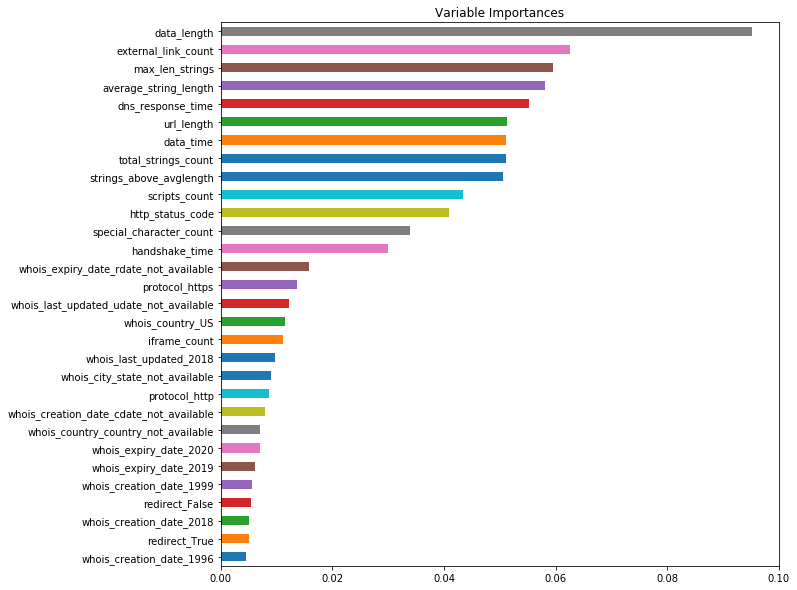

In [168]:
pd.Series(index = imp_features, data = VALUES).plot(kind='barh', title='Variable Importances', figsize = (10,10))


In [179]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(X_train)
scaled_X_train = SS.transform(X_train)
scaled_X_test = SS.transform(X_test)
scaled_X_train.shape

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


(1229, 389)

### Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear", class_weight="balanced").fit(scaled_X_train, Y_train)

              precision    recall  f1-score   support

           0       0.43      0.78      0.55        68
           1       0.96      0.85      0.90       460

   micro avg       0.84      0.84      0.84       528
   macro avg       0.70      0.81      0.73       528
weighted avg       0.89      0.84      0.86       528

[[ 53  15]
 [ 71 389]]
accuracy_score :  0.8371212121212122


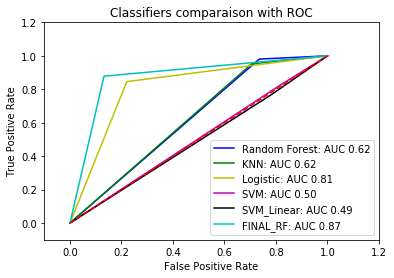

In [182]:
pred = clf.predict(scaled_X_test)
prediction["Logistic"] = pred
eval_model(Y_test, pred)
AuROC(prediction, Y_test)

### SVM

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.40      0.75      0.52        68
           1       0.96      0.83      0.89       460

   micro avg       0.82      0.82      0.82       528
   macro avg       0.68      0.79      0.71       528
weighted avg       0.89      0.82      0.84       528

[[ 51  17]
 [ 76 384]]
accuracy_score :  0.8238636363636364


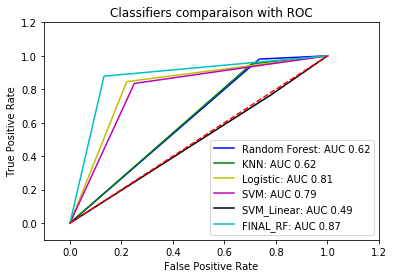

In [184]:

from sklearn.svm import SVC
clf = SVC(class_weight = {0:7, 1:1}, kernel = "rbf")
clf.fit(scaled_X_train,Y_train)
pred = clf.predict(scaled_X_test)
eval_model(Y_test, pred)
prediction["SVM"] = pred
AuROC(prediction, Y_test)

              precision    recall  f1-score   support

           0       0.42      0.68      0.52        68
           1       0.95      0.86      0.90       460

   micro avg       0.84      0.84      0.84       528
   macro avg       0.68      0.77      0.71       528
weighted avg       0.88      0.84      0.85       528

[[ 46  22]
 [ 64 396]]
accuracy_score :  0.8371212121212122


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


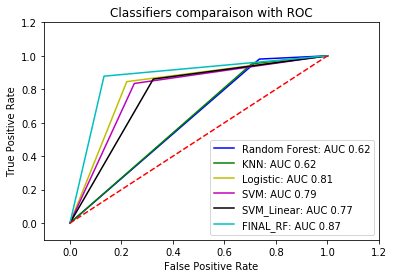

In [185]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(class_weight = {0:7, 1:1})
clf.fit(scaled_X_train,Y_train)
pred = clf.predict(scaled_X_test)
eval_model(Y_test, pred)
prediction["SVM_Linear"] = pred
AuROC(prediction, Y_test)

### Trying for any improvement possible with this data

In [154]:
from sklearn.model_selection import RandomizedSearchCV
import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 8, 13, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 6, 9]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [3, 6, 9],
 'min_samples_split': [3, 8, 13, 20],
 'n_estimators': [50, 90, 131, 172, 213, 254, 295, 336, 377, 418, 459, 500]}


Number of settings : 2*11*2*3*4*12 = 6336 combinations

In [155]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(class_weight={0:7,1:1})
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, \
                               verbose=2, random_state=42, n_jobs = -1,)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 7, 1: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [50, 90, 131, 172, 213, 254, 295, 336, 377, 418, 459, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150, None], 'min_samples_split': [3, 8, 13, 20], 'min_samples_leaf': [3, 6, 9], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbo

In [156]:
rf_random.best_params_

{'n_estimators': 254,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 134,
 'bootstrap': False}

>We have narrowed down the combination, before proceeding with more detailed combination lets just check the performance once

In [125]:
rf = rf_random.best_estimator_
pred = rf.predict(X_test)
eval_model(Y_test, pred)

              precision    recall  f1-score   support

           0       0.45      0.77      0.57        65
           1       0.96      0.87      0.91       463

   micro avg       0.86      0.86      0.86       528
   macro avg       0.71      0.82      0.74       528
weighted avg       0.90      0.86      0.87       528

[[ 50  15]
 [ 61 402]]
accuracy_score :  0.8560606060606061


There is significant improvement in recall. So we can keep this model for further testing purposes

In [114]:
import pickle
pickle.dump(rf_random,open("final_random_forest.sav", "wb"))

In [117]:
pickle.dump(clf, open("SVM_LINEAR_MODEL.sav","wb"))

In [119]:
model = pickle.load(open("SVM_LINEAR_MODEL.sav","rb"))
result = model.predict(x_test)
eval_model(y_test, result)


              precision    recall  f1-score   support

           0       0.36      0.75      0.48        69
           1       0.96      0.80      0.87       459

   micro avg       0.79      0.79      0.79       528
   macro avg       0.66      0.77      0.68       528
weighted avg       0.88      0.79      0.82       528

[[ 52  17]
 [ 94 365]]
accuracy_score :  0.7897727272727273


In [123]:
pickle.dump(clf, open("Logistic_final.sav", "wb"))

              precision    recall  f1-score   support

           0       0.51      0.87      0.64        68
           1       0.98      0.88      0.93       460

   micro avg       0.88      0.88      0.88       528
   macro avg       0.75      0.87      0.79       528
weighted avg       0.92      0.88      0.89       528

[[ 59   9]
 [ 56 404]]
accuracy_score :  0.8768939393939394


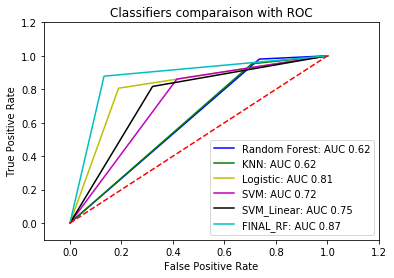

In [175]:
model = pickle.load(open("final_random_forest.sav","rb"))
result = model.predict(X_test)
eval_model(Y_test, result)
prediction["FINAL_RF"] = result
AuROC(prediction, y_test)

In [194]:
model = rf_random.best_estimator_

In [197]:
features = list(data_final)
feature_importances= dict()
imps = []
from sklearn.feature_selection import SelectFromModel
for feature in zip(features, model.feature_importances_):
    feature_importances[feature[0]] = feature[1]
for key in feature_importances.keys():
#     print(key)
    imps.append(feature_importances[key])
imps = np.array(imps)
indexes = np.argsort(imps, axis=-1, kind='quicksort', order=None)
sorted_imps = sorted(imps)
#pick the top 10 features
VALUES = sorted_imps[-15:]
feature_indexes = indexes[-15:]
imp_features=[]
for i in feature_indexes:
    imp_features.append(features[i])

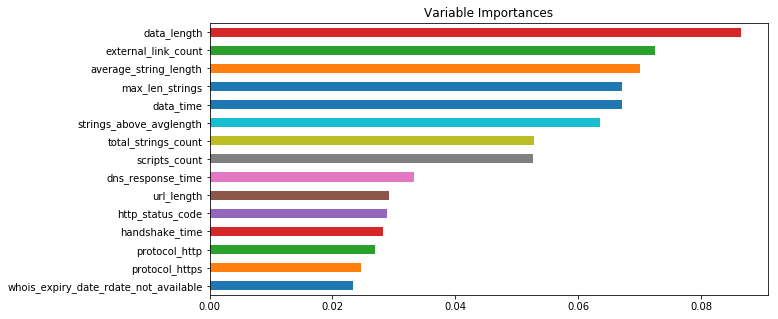

In [199]:
pd.Series(index = imp_features, data = VALUES).plot(kind='barh', title='Variable Importances', figsize = (10,5))
